# Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [40]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [41]:
#loading data
df=pd.read_csv("churn_c.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [42]:
#checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#There is no null values

In [43]:
#checking for unique values in each columns
df.apply(lambda x:len(x.unique()))

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [44]:
#droping customer_id
df.drop("customerID",axis=1,inplace=True)

In [45]:
#checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [46]:
#extracting object type
cat=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="object":
        cat.append(x)
cat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [47]:
#checking the value couts in all the object type variable
for col in cat:
    print(col)
    print(df[col].value_counts())
    print()

gender
Male      3555
Female    3488
Name: gender, dtype: int64

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    152

In [48]:
#extracting not object type
ncat=[]
for x in df.dtypes.index:
    if df.dtypes[x]!="object":
        ncat.append(x)
ncat

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [49]:
#checking the value couts in all the object type variable
for col in ncat:
    print(col)
    print(df[col].value_counts())
    print()

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64



<AxesSubplot:xlabel='gender', ylabel='count'>

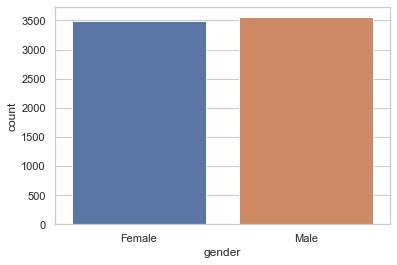

In [50]:
#gender
sns.countplot("gender", data=df)

In [ ]:
#there is equal number of gender

<AxesSubplot:xlabel='Partner', ylabel='count'>

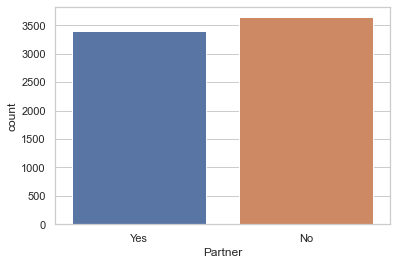

In [51]:
#Partner
sns.countplot("Partner", data=df)

In [ ]:
#the people with partner and single is nearly equal

<AxesSubplot:xlabel='Dependents', ylabel='count'>

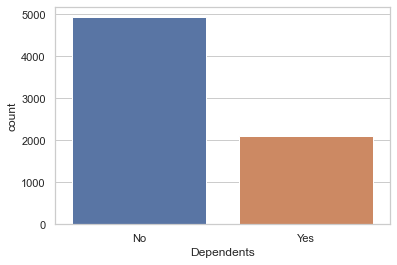

In [52]:
#Dependents
sns.countplot("Dependents", data=df)

In [ ]:
#more people has no dependents

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

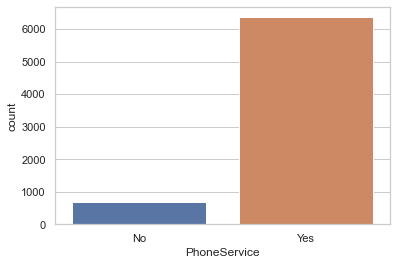

In [53]:
#PhoneService
sns.countplot("PhoneService", data=df)

In [ ]:
#majority of people has phone services

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

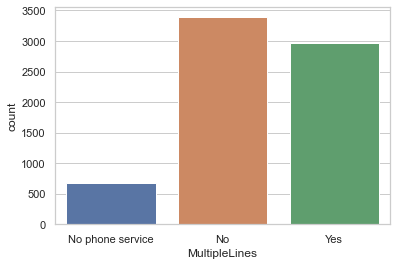

In [54]:
#MultipleLines
sns.countplot("MultipleLines", data=df)

In [ ]:
#very few people has no phone services
#more people dont have multiple lines

<AxesSubplot:xlabel='InternetService', ylabel='count'>

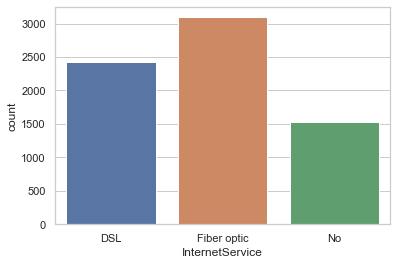

In [55]:
#InternetService
sns.countplot("InternetService", data=df)

In [ ]:
#alot of people has fiv=ber optic internet services while some uses DSL

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

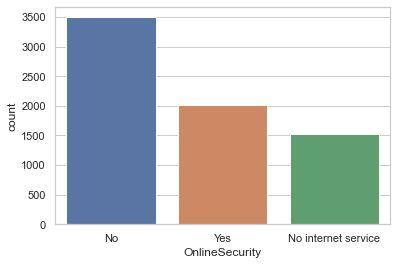

In [56]:
#OnlineSecurity
sns.countplot("OnlineSecurity", data=df)

In [ ]:
#alot of people dont have online security

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

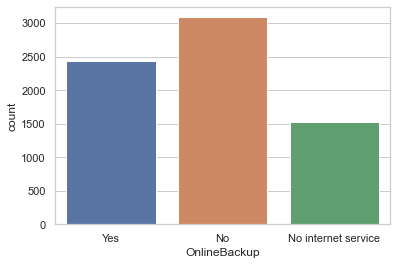

In [57]:
#OnlineBackup
sns.countplot("OnlineBackup", data=df)

In [ ]:
#majority of people is either with no Online backup or no internet services

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

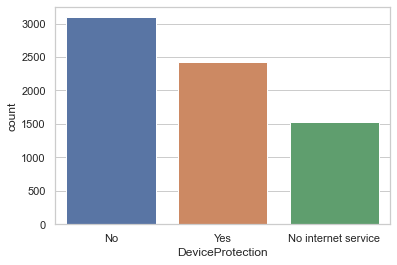

In [58]:
#DeviceProtection
sns.countplot("DeviceProtection", data=df)

In [ ]:
#majority of peple has no deviceprotection 

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

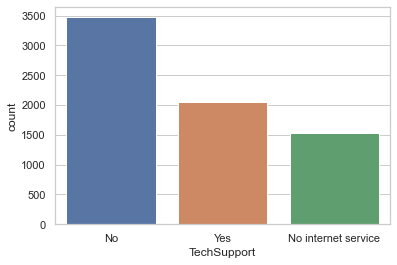

In [59]:
#TechSupport
sns.countplot("TechSupport", data=df)

In [ ]:
#alot of people dont have tech support

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

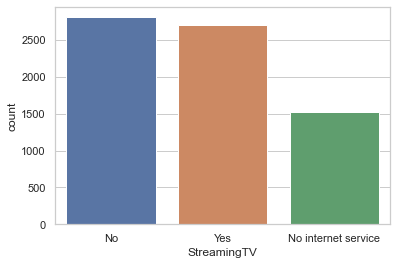

In [60]:
#StreamingTV
sns.countplot("StreamingTV", data=df)

In [ ]:
#there is good amount of people who has streaming tv

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

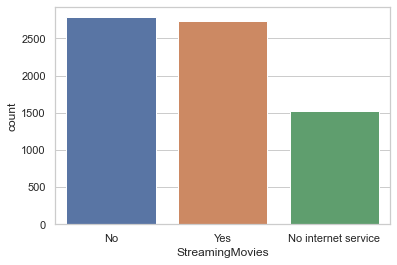

In [61]:
#StreamingMovies
sns.countplot("StreamingMovies", data=df)

In [ ]:
#there is good amount of people who has streaming movies

<AxesSubplot:xlabel='Contract', ylabel='count'>

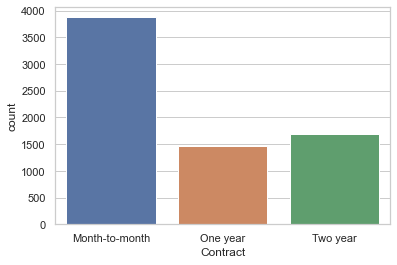

In [62]:
#Contract
sns.countplot("Contract", data=df)

In [ ]:
#majority of people relay on month to month contract

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

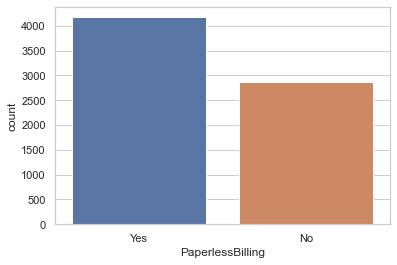

In [63]:
#PaperlessBilling
sns.countplot("PaperlessBilling", data=df)

In [ ]:
#most people prefer paper less bills

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

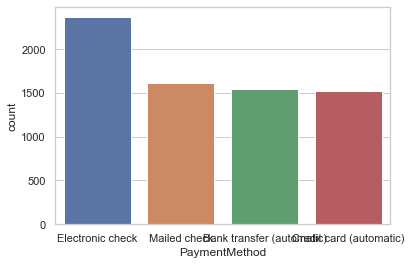

In [64]:
#PaymentMethod
plt.xticks(rotation=90)
sns.countplot("PaymentMethod", data=df)

In [ ]:
#electronic check is the most favored payment method

<AxesSubplot:xlabel='Churn', ylabel='count'>

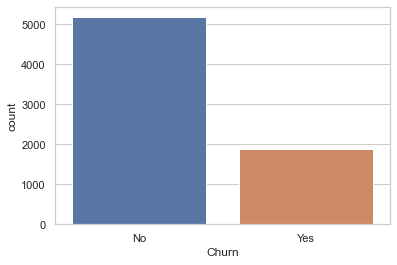

In [66]:
#Churn
sns.countplot("Churn", data=df)

In [ ]:
#majority of customer chrun resulted in no
#the dependent dataset is highly imbalanced

In [65]:
#converting TotalCharges to float catogery
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [75]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [76]:
df.dropna(inplace=True)

In [77]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [67]:
#craeting a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(10,6))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

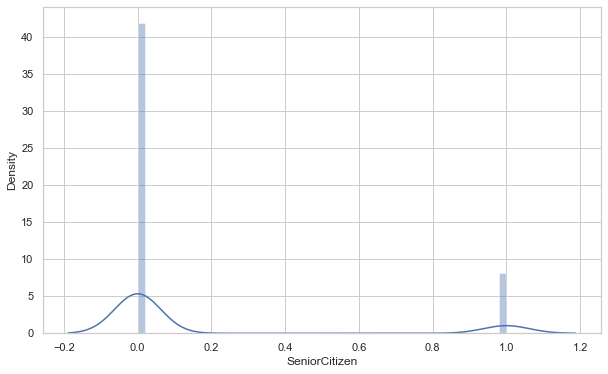

In [68]:
#SeniorCitizen
histogram(df,"SeniorCitizen")

In [ ]:
#majority of people is not senior citizen

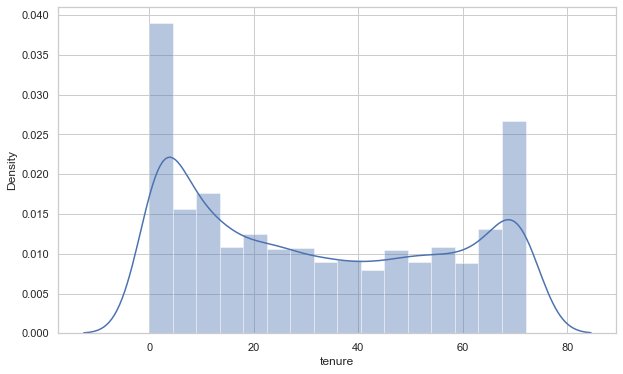

In [69]:
#tenure
histogram(df,"tenure")

In [ ]:
#the tenure gores from 0 to 70

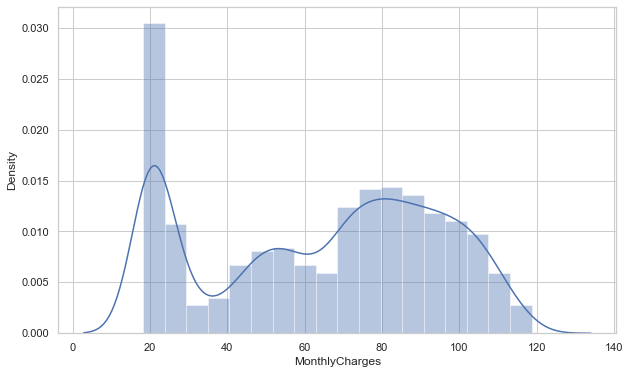

In [70]:
#MonthlyCharges
histogram(df,"MonthlyCharges")

In [ ]:
#the monthly charges lies from 20 to 120

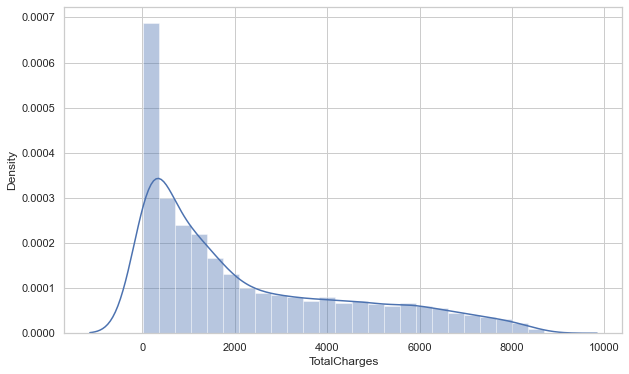

In [71]:
#TotalCharges
histogram(df,"TotalCharges")

In [ ]:
#the TotalCharges lies form 0 approx 8k

In [72]:
#creating list for bivariate analysis
feature=['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']


In [73]:
#enumerating list
list(enumerate(feature))

[(0, 'gender'),
 (1, 'Partner'),
 (2, 'Dependents'),
 (3, 'PhoneService'),
 (4, 'MultipleLines'),
 (5, 'InternetService'),
 (6, 'OnlineSecurity'),
 (7, 'OnlineBackup'),
 (8, 'DeviceProtection'),
 (9, 'TechSupport'),
 (10, 'StreamingTV'),
 (11, 'StreamingMovies'),
 (12, 'Contract'),
 (13, 'PaperlessBilling'),
 (14, 'PaymentMethod'),
 (15, 'Churn')]

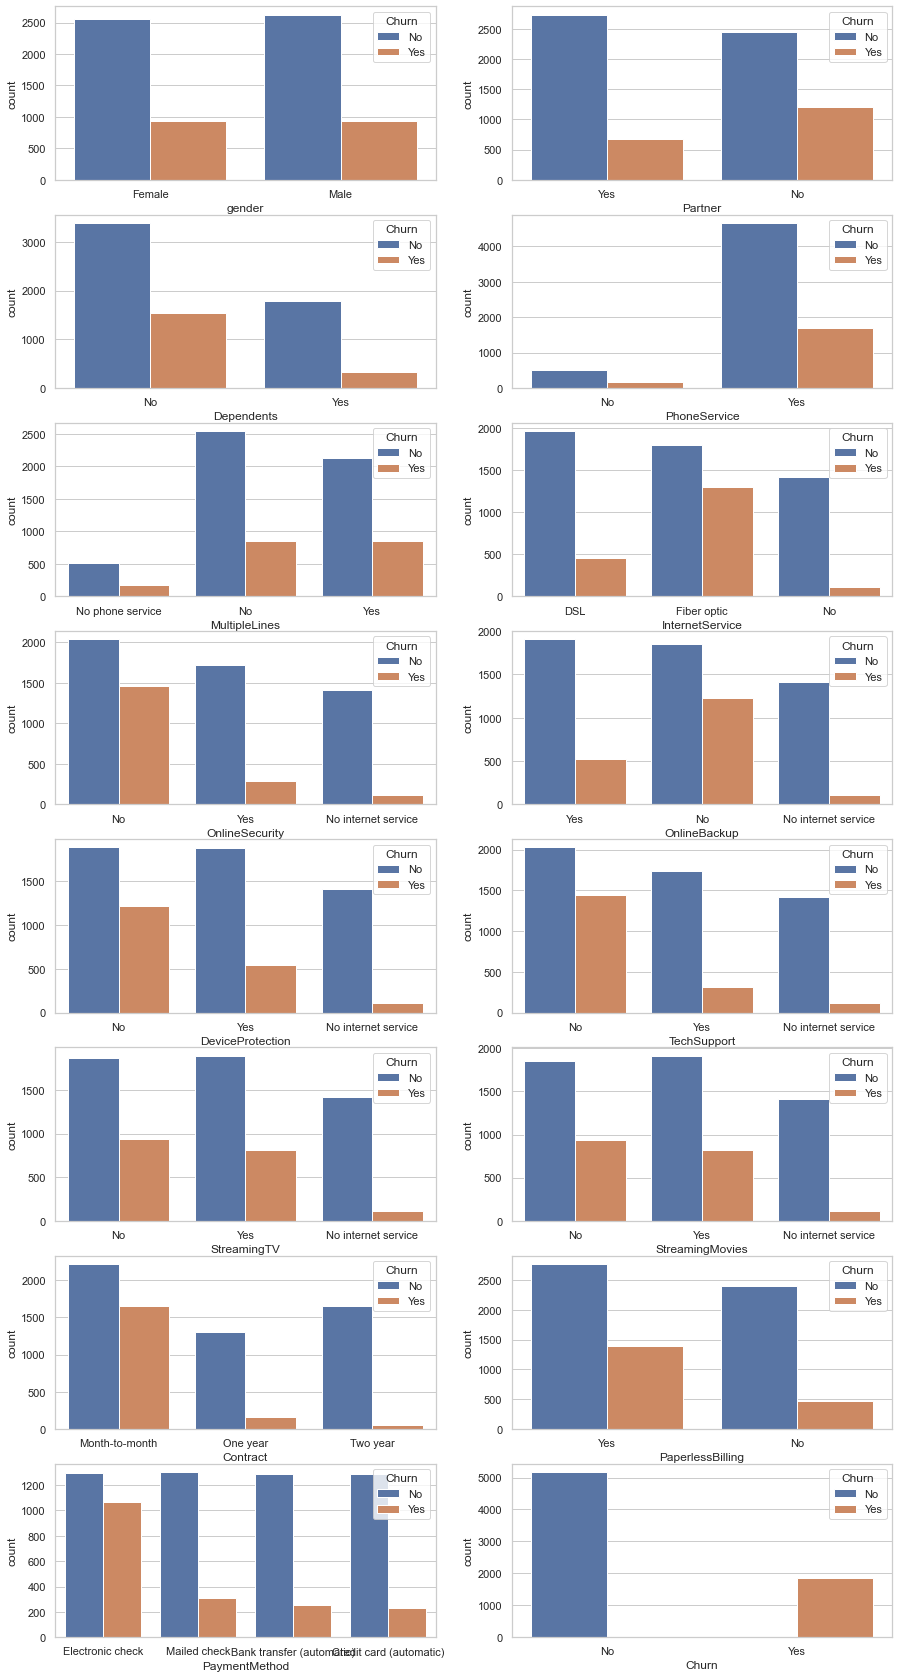

In [74]:
#bivariate analysis with hue="Churn"
plt.figure(figsize=(15,30))
for i in enumerate(feature):
    plt.subplot(8,2,i[0]+1)
    sns.countplot(i[1],hue="Churn",data=df)

In [ ]:
#Gender is vey less correlated to churn
#the people who are single is more inclined toward churn
#the people who are not dependent are more inclined towards churn
#people who hav ephone services are more inclined towards churn
#people who have fiberoptic internet servicies are more inclined towards churn
#people who dont hav eonline security are more inclined towards churn
#people who dont have online backup are more inclined towards churn
#people with no device protection are more inclined towards churn
#people with no tech support are more inclined towards churn
#people with month to month sucription are more inclined towards churn
#with with paperlessbilling are more inclined to churm
#people with electronic check payment method are highly inclined to churn

In [78]:
#Encoding data
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Dependents"]=encoder.fit_transform(df['Dependents'])
df["PhoneService"]=encoder.fit_transform(df['PhoneService'])
df["MultipleLines"]=encoder.fit_transform(df['MultipleLines'])
df["InternetService"]=encoder.fit_transform(df['InternetService'])
df["OnlineSecurity"]=encoder.fit_transform(df['OnlineSecurity'])
df["OnlineBackup"]=encoder.fit_transform(df['OnlineBackup'])
df["DeviceProtection"]=encoder.fit_transform(df['DeviceProtection'])
df["TechSupport"]=encoder.fit_transform(df['TechSupport'])
df["StreamingTV"]=encoder.fit_transform(df['StreamingTV'])
df["StreamingMovies"]=encoder.fit_transform(df['StreamingMovies'])
df["Contract"]=encoder.fit_transform(df['Contract'])
df["PaperlessBilling"]=encoder.fit_transform(df['PaperlessBilling'])
df["PaymentMethod"]=encoder.fit_transform(df['PaymentMethod'])
df["Churn"]=encoder.fit_transform(df['Churn'])
df["Partner"]=encoder.fit_transform(df['Partner'])
df["gender"]=encoder.fit_transform(df['gender'])

In [79]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<AxesSubplot:>

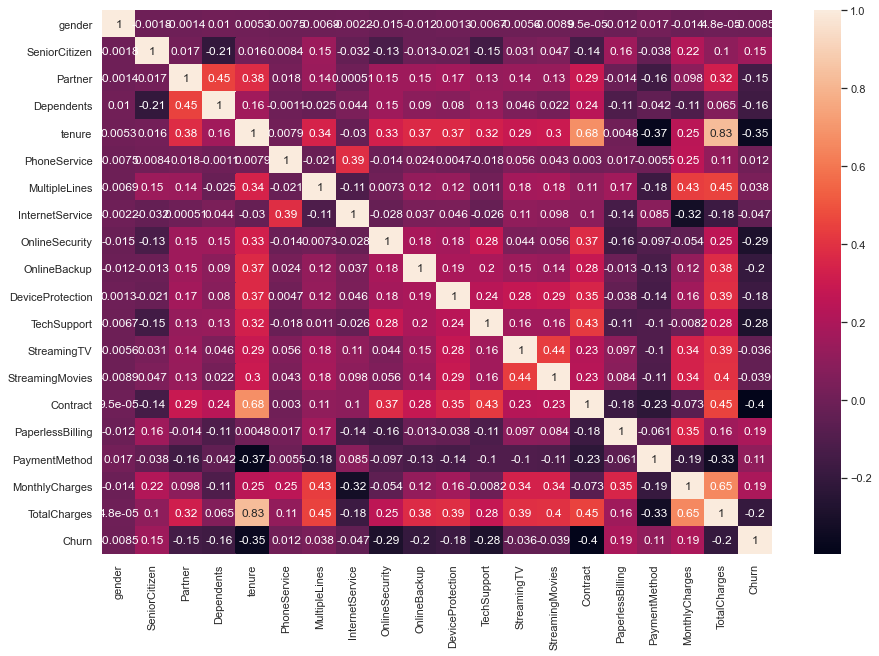

In [80]:
#checcking correlation
cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True)

In [81]:
#since there are to many columns, sorting correlation with attrition in desending order
df.corr()["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

In [ ]:
#monthly charges is hihly positively correlated 
#contract is highly negatively correlated

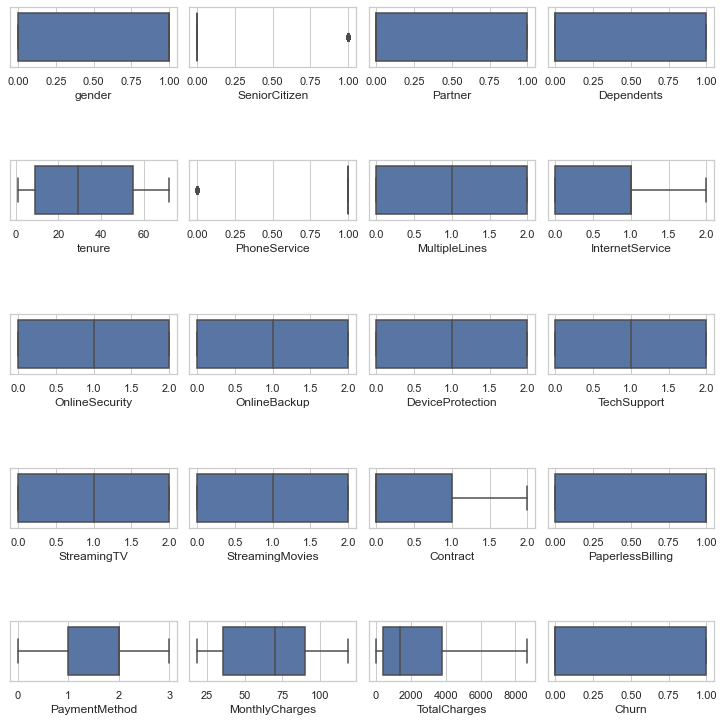

In [83]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=4,nrows=5, figsize=(10,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [ ]:
#there is no outliers

In [84]:
#checking for skewness
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

In [85]:
#spliting data in x and y
x=df.drop("Churn", axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [86]:
y=df["Churn"]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [87]:
#treating skewness with power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
#checking for skewness
df_new.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure             -0.242816
PhoneService       -2.729727
MultipleLines       0.033718
InternetService    -0.072388
OnlineSecurity      0.150928
OnlineBackup       -0.000378
DeviceProtection    0.002098
TechSupport         0.141282
StreamingTV        -0.096494
StreamingMovies    -0.105966
Contract            0.304841
PaperlessBilling   -0.377503
PaymentMethod      -0.207192
MonthlyCharges     -0.259485
TotalCharges       -0.144643
dtype: float64

In [88]:
x=df_new

In [89]:
#importing libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

<AxesSubplot:xlabel='Churn', ylabel='count'>

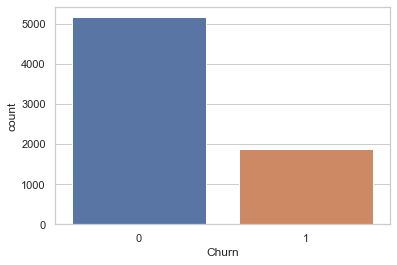

In [90]:
#the dependent varible is unbalenced
sns.countplot(y)

In [91]:
#using upsampling to balance the data
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
#data transformation
x,y = oversample.fit_resample(x,y)

<AxesSubplot:xlabel='Churn', ylabel='count'>

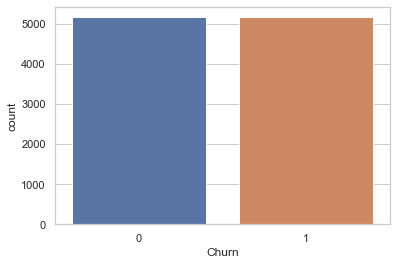

In [92]:
#again checking dependent variable
sns.countplot(y)

In [93]:
#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7228, 19), (3098, 19), (7228,), (3098,))

In [94]:
# function to train, test and performance check 
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""The classification report is:
    """,classification_report(y_test, predict))
       
    print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
    print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))
    print("cross_val_score: ",cross_val_score(model,x,y,cv=5).mean())

In [95]:
#DecisionTreeClassifier
model(DecisionTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.79      0.77      0.78      1546
           1       0.78      0.80      0.79      1552

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098

The accuracy score is:  0.7856681730148483
The confusion matrix is:
    
     [[1196  350]
 [ 314 1238]]
cross_val_score:  0.7874369065394056


In [96]:
#RandomForestClassifier
model(RandomForestClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.85      0.85      0.85      1546
           1       0.85      0.85      0.85      1552

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098

The accuracy score is:  0.8486120077469335
The confusion matrix is:
    
     [[1308  238]
 [ 231 1321]]
cross_val_score:  0.8512561030778499


In [97]:
#SVC
model(SVC)

The classification report is:
                   precision    recall  f1-score   support

           0       0.82      0.79      0.81      1546
           1       0.80      0.83      0.81      1552

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098

The accuracy score is:  0.8092317624273725
The confusion matrix is:
    
     [[1220  326]
 [ 265 1287]]
cross_val_score:  0.8083508622245557


In [98]:
#Naive Bayes
model(GaussianNB)

The classification report is:
                   precision    recall  f1-score   support

           0       0.77      0.75      0.76      1546
           1       0.76      0.78      0.77      1552

    accuracy                           0.76      3098
   macro avg       0.76      0.76      0.76      3098
weighted avg       0.76      0.76      0.76      3098

The accuracy score is:  0.7643641058747579
The confusion matrix is:
    
     [[1161  385]
 [ 345 1207]]
cross_val_score:  0.7687401934702047


In [99]:
#KNeighborsClassifier
model(KNeighborsClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.87      0.71      0.78      1546
           1       0.75      0.90      0.82      1552

    accuracy                           0.80      3098
   macro avg       0.81      0.80      0.80      3098
weighted avg       0.81      0.80      0.80      3098

The accuracy score is:  0.802130406714009
The confusion matrix is:
    
     [[1093  453]
 [ 160 1392]]
cross_val_score:  0.7970192837336422


In [ ]:
#random forest classifier is our best model
#the differance between cross val score and accuracy score is 0
#and it has highest accuracy score

In [100]:
#creating parameter
parameter={"criterion":["gini","entropy"],
           "max_depth":[1,2,3,4,5,6,7,8,9,"None"],
           "max_features" :["auto","sqrt","log2"],
           "n_estimators":[50,100]
          }

In [101]:
#using GridSearchCV for Hyper parameter tunning
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 'None'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100]})

In [102]:
#checking best parameters
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'n_estimators': 50}

In [106]:
best_model=RandomForestClassifier(criterion="entropy",max_depth=9,max_features="log2",n_estimators=50)
best_model.fit(x_train,y_train)
predict=best_model.predict(x_test)
print("""The classification report is:
    """,classification_report(y_test, predict))
       
print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))
print("cross_val_score: ",cross_val_score(model,x,y,cv=5).mean())

The classification report is:
                   precision    recall  f1-score   support

           0       0.85      0.80      0.82      1546
           1       0.81      0.85      0.83      1552

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098

The accuracy score is:  0.8273079406068431
The confusion matrix is:
    
     [[1237  309]
 [ 226 1326]]
cross_val_score:  0.8248153782326095


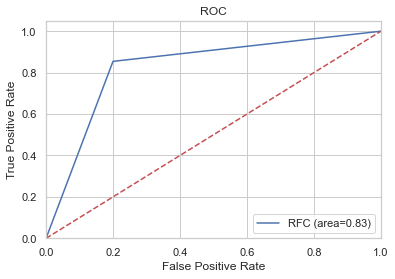

In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rfc_roc_auc=roc_auc_score(y_test, best_model.predict(x_test))
fpr, tpr,thresholds=roc_curve(y_test,best_model.predict(x_test))
plt.figure
plt.plot(fpr,tpr, label="RFC (area=%0.2f)" % rfc_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.savefig("RFC_ROC")
plt.show()

In [ ]:
#83 percent of the data is under the curve

In [107]:
#savingThemodel
import joblib
joblib.dump(best_model,"Next_Tmin.pkl")

['Next_Tmin.pkl']